In [4]:
print('1. What was the change in price of the stock over time?') 
print('2. What was the daily return of the stock on average?')        
print('3. What was the moving average of the various stocks?')         
print('4. What was the correlation between different stocks closing prices?')         
print('5. How much value do we put at risk by investing in a particular stock?')        
print('6. How can we attempt to predict future stock behavior?')        


1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks closing prices?
5. How much value do we put at risk by investing in a particular stock?
6. How can we attempt to predict future stock behavior?


In [5]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [15]:
from pandas.io.data import DataReader

In [8]:
from datetime import datetime

In [9]:
from __future__ import division

In [10]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [11]:
end = datetime.now()

start = datetime(end.year - 1, end.month, end.day)

In [12]:
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [14]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,104.975357,105.923135,104.011309,104.994643,4.196861e+07,103.716515
std,8.186920,8.222124,8.114901,8.179238,1.694614e+07,7.729643
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,89.853242
25%,97.295000,98.205000,96.542502,97.137499,2.973500e+07,96.300820
50%,105.620003,106.475002,104.924999,105.890004,3.784605e+07,104.706827
75%,111.125000,112.257500,109.774998,111.060001,5.001590e+07,109.382777
max,123.129997,123.820000,121.620003,122.570000,1.333697e+08,120.004194


In [16]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-09-03 to 2016-09-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


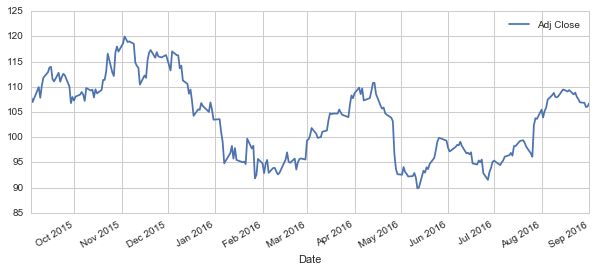

In [19]:
#historical view of the closing price
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

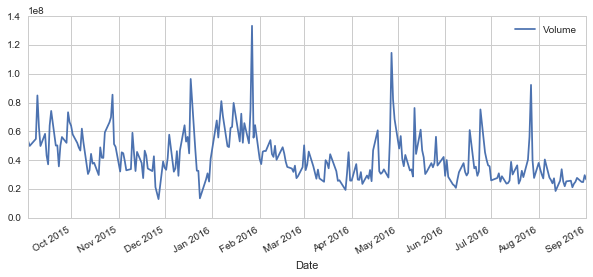

In [20]:
#Total value of stock thats being tradedd each day in that year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [25]:
#find the moving average
#create a column name calling the string for 10,20,50
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'],ma)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()


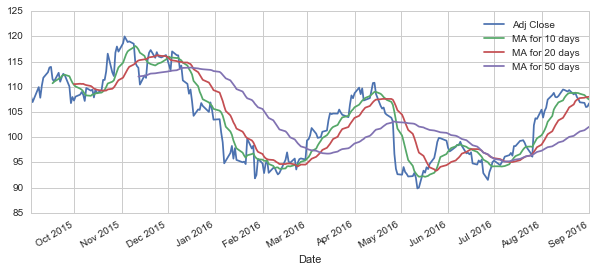

In [28]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

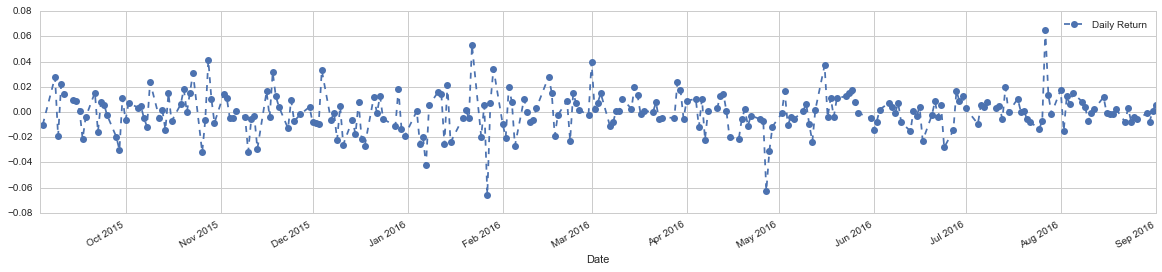

In [33]:
#Daily Returns and risk of the stock
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(20,4),legend=True,linestyle='--',marker='o')

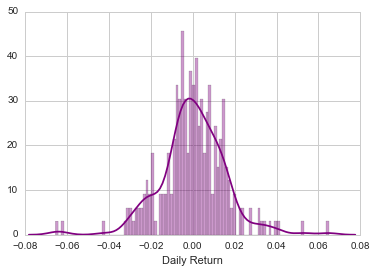

In [39]:
#average daily return for the past year
#allows us to place two plot on each other
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

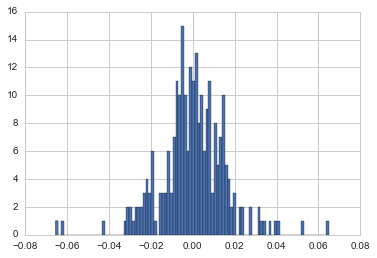

In [36]:
AAPL['Daily Return'].hist(bins=100)

In [40]:
#Analyze all the returns on our list (DataReader reads files from the web)
closing_DF = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [42]:
closing_DF.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-03,108.059584,504.720001,606.250000,42.338873
2015-09-04,106.982605,499.000000,600.700012,41.472630
2015-09-08,109.958969,517.539978,614.659973,42.718463
2015-09-09,107.844189,516.890015,612.719971,41.920351
2015-09-10,110.213528,522.239990,621.349976,42.134480


In [44]:
tech_rets = closing_DF.pct_change()

In [45]:
#daily percentage returns
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-03,NaN,NaN,NaN,NaN
2015-09-04,-0.009967,-0.011333,-0.009155,-0.020460
2015-09-08,0.027821,0.037154,0.023239,0.030040
2015-09-09,-0.019232,-0.001256,-0.003156,-0.018683
2015-09-10,0.021970,0.010350,0.014085,0.005108


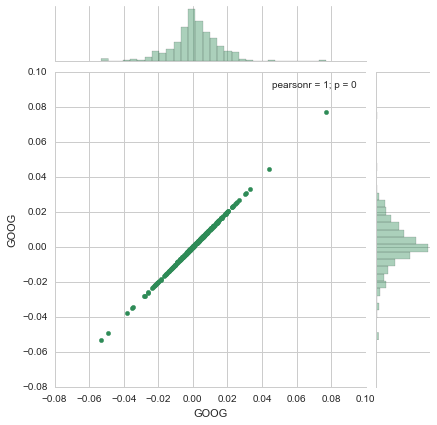

In [46]:
sns.jointplot('GOOG','GOOG',tech_rets,kind = 'scatter', color ='seagreen')

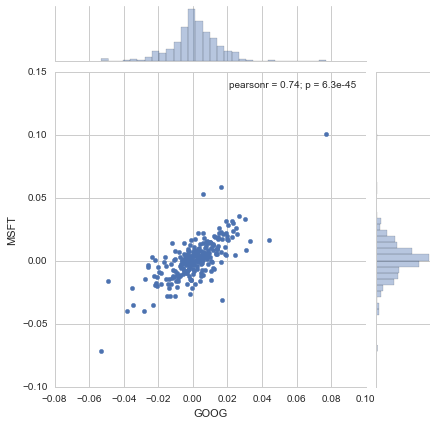

In [47]:
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

In [48]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-03,NaN,NaN,NaN,NaN
2015-09-04,-0.009967,-0.011333,-0.009155,-0.020460
2015-09-08,0.027821,0.037154,0.023239,0.030040
2015-09-09,-0.019232,-0.001256,-0.003156,-0.018683
2015-09-10,0.021970,0.010350,0.014085,0.005108


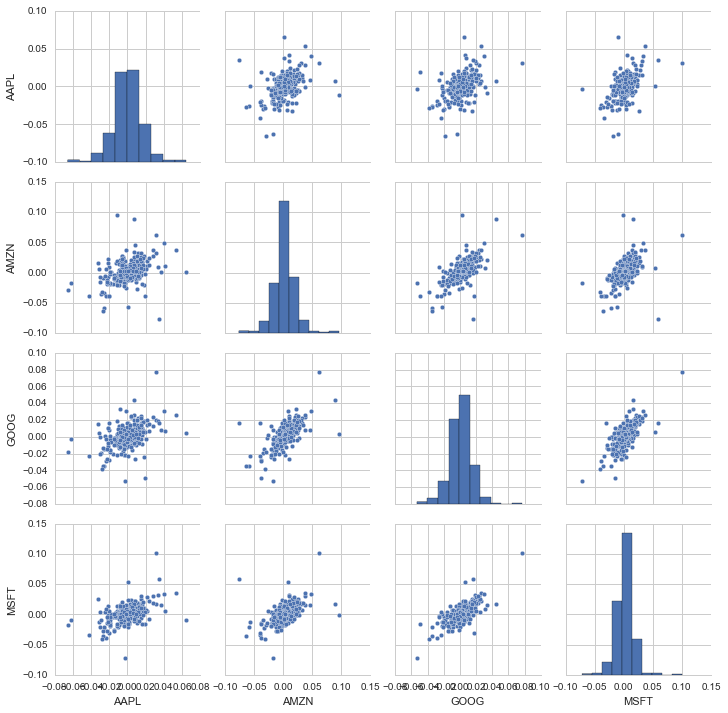

In [49]:
sns.pairplot(tech_rets.dropna())

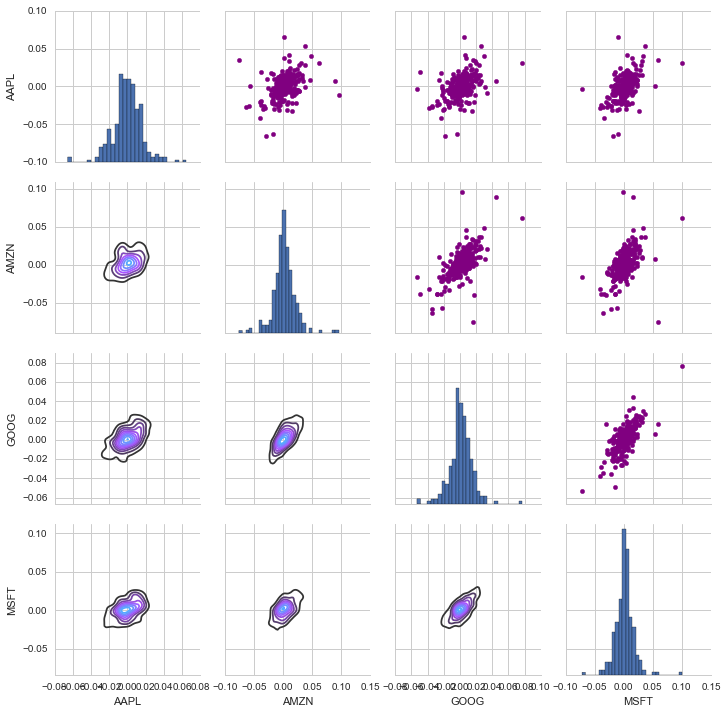

In [51]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

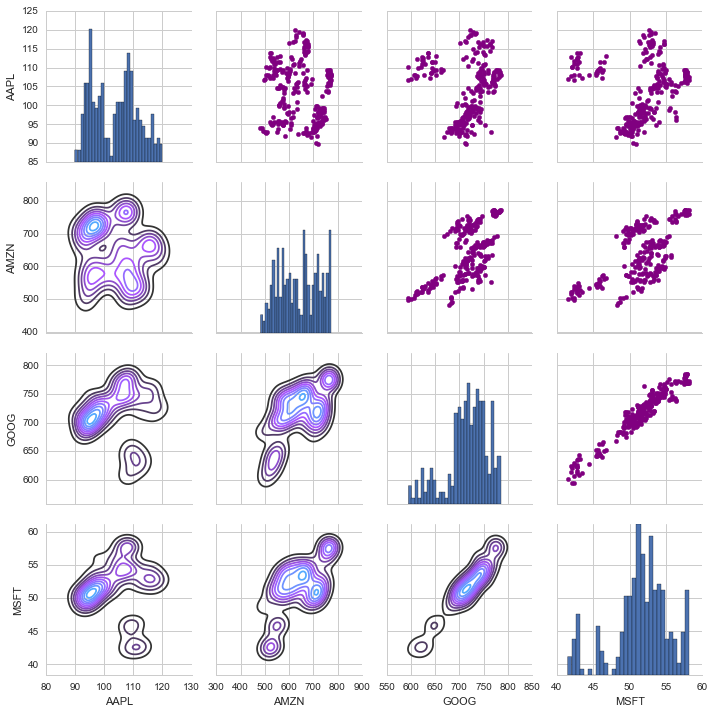

In [53]:
returns_fig = sns.PairGrid(closing_DF)

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

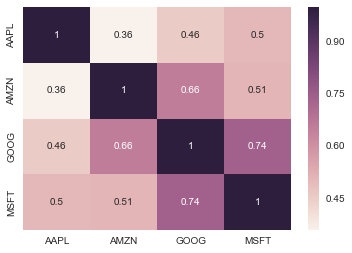

In [55]:
sns.heatmap(tech_rets.corr(),annot=True)

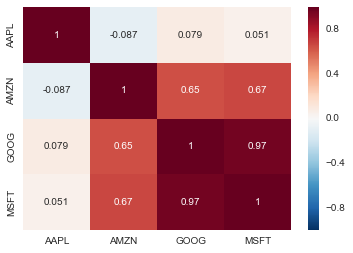

In [57]:
sns.heatmap(closing_DF.corr(),annot=True)

In [58]:
rets = tech_rets.dropna()

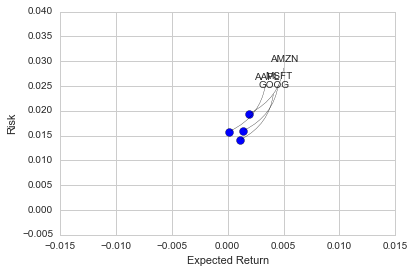

In [59]:
#areas of the circle in the scatter plot
area = np.pi*20

plt.scatter(rets.mean(),rets.std(),s = area)

#Set the x and y limits
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy = (x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

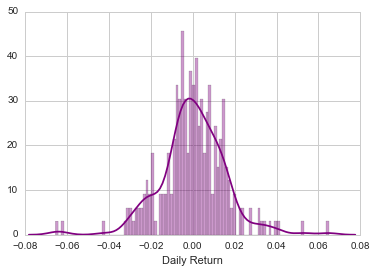

In [62]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')





In [63]:
#get the risk value of the stock
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-09-04,-0.009967,-0.011333,-0.009155,-0.020460
2015-09-08,0.027821,0.037154,0.023239,0.030040
2015-09-09,-0.019232,-0.001256,-0.003156,-0.018683
2015-09-10,0.021970,0.010350,0.014085,0.005108
2015-09-11,0.014569,0.013787,0.007114,0.004389


In [65]:
rets['AAPL'].quantile(0.05)

-0.025352258687266975

In [67]:
print('The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019*1,000,000 = $19,000')

The 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, our worst daily loss will not exceed 1.9%. If we have a 1 million dollar investment, our one-day 5% VaR is 0.019*1,000,000 = $19,000
